In [206]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
%matplotlib inline
pio.templates.default = "plotly_white"

data = pd.read_csv("credit_scoring.csv")
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [207]:
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [208]:
#chceking for null data values
data.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

Distribution of the credit utilization ratio in the data

In [209]:
credit_utilization_fig = px.box(data, y='Credit Utilization Ratio',title='Credit Utilization Ratio Distribution')
credit_utilization_fig.show()

Distribution of the loan amount in the data

In [210]:
loan_amount_fig = px.histogram(data, x='Loan Amount', nbins=20, title='Loan Amount Distribution')
loan_amount_fig.show()

Correlation in the data

In [211]:
numeric_df = data[['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts', 'Loan Amount', 'Interest Rate', 'Loan Term']]
correlation_fig = px.imshow(numeric_df.corr(), title='Correlation Heatmap')
correlation_fig.show()

Calculating credit score using FICO score method

In [212]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
data['Education Level'] = data['Education Level'].map(education_level_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in data.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
data['Credit Score'] = credit_scores

print(data.head())

   Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                3                  1   
1   25    Male        Married                1                  0   
2   30  Female         Single                3                  1   
3   58  Female        Married                4                  0   
4   32    Male        Married                2                  2   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit Score  
0      4675000           2.65         48  Personal Loan       

Manual Elbow method to select k value

In [213]:
from sklearn.cluster import KMeans

In [214]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [215]:
wcss

[83893236.16507576,
 21193125.3877905,
 9412670.29370353,
 5192242.84847806,
 3394642.2889938345,
 2358263.620114067,
 1774259.4734416176,
 1308458.427723754,
 1051241.497328287,
 884095.90071516]

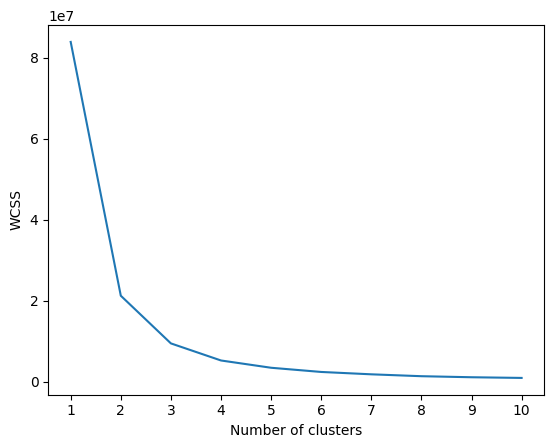

In [216]:
##plotting elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Knee locator

In [217]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

Using the KMeans clustering algorithm to segment customers based on their credit scores

In [218]:


X = data[['Credit Score']]
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)
data['Segment'] = kmeans.labels_

In [219]:
# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(data, x=data.index, y='Credit Score', color='Segment',color_discrete_sequence=['green', 'blue', 'yellow', ])
fig.update_layout(xaxis_title='Customer Index',yaxis_title='Credit Score',title='Customer Segmentation based on Credit Scores')
fig.show()

In [220]:
#Naming the segments based on above clusters
data['Segment'] = data['Segment'].map({  0: 'Low', 1: 'Excellent',2:'Good' })

# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(data, x=data.index, y='Credit Score', color='Segment', color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(xaxis_title='Customer Index',yaxis_title='Credit Score',title='Customer Segmentation based on Credit Scores')
fig.show()

In [221]:
##Performance matrix--silhoutte score
from sklearn.metrics import silhouette_score 

In [222]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_coefficients.append(score)

In [223]:
silhouette_coefficients

[0.6250188790041277,
 0.5904804317521523,
 0.5816098443725243,
 0.5676166295799988,
 0.5551547363423853,
 0.5442221627339877,
 0.5546359312999889,
 0.5466030387327145,
 0.5248969109364093]

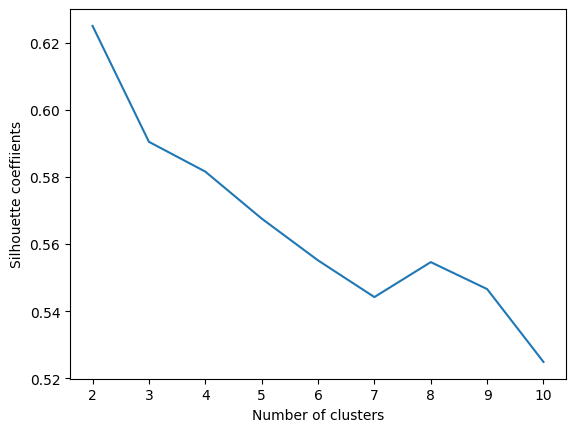

In [224]:
##plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coeffiients")
plt.show()

Hierarchical Clustering

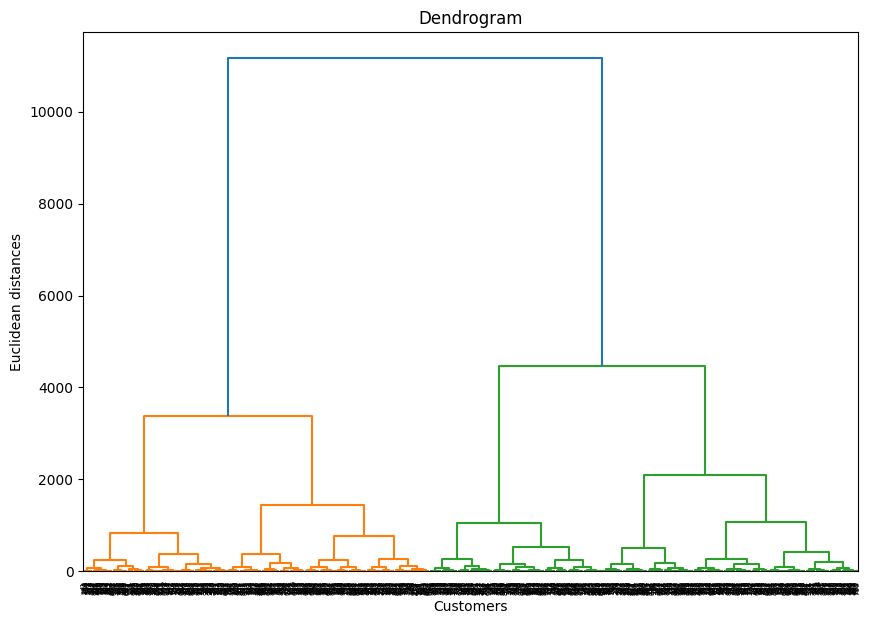

In [225]:
##aglomerative clustering
## to construct a dendogram
import scipy.cluster.hierarchy as sc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


# Creating the linkage matrix
Z = linkage(data[['Credit Score']], method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [226]:
# Create the model
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fit the model
data['Segment'] = hc.fit_predict(data[['Credit Score']])

In [227]:
# Map the clusters to meaningful segment names (based on your analysis)
data['Segment'] = data['Segment'].map({0: 'Excellent', 1: 'Low', 2: 'Good'})

# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Visualize the segments
fig = px.scatter(data, x=data.index, y='Credit Score', color='Segment', color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores (Hierarchical Clustering)'
)
fig.show()

In [228]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, data['Segment'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg:.2f}')

Silhouette Score for Hierarchical Clustering: 0.54
